### Proyecto: Predicci√≥n de enfermedades: Soporte para la toma de decisiones

##### ![1) Definici√≥n del objetivo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Definici%C3%B3n%20del%20objetivo.jpg?raw=true)

Se busca obtener un modelo computacional que permita la predicci√≥n de enfermedades, dicho modelo se convertir√° en un soporte para la toma de decisiones m√©dicas cuya aplicaci√≥n estar√° enfocada principalmente en estudiantes de medicina reci√©n graduados que est√©n atravesando por su primer a√±o de residencia.

##### ![2) Contexto comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Contexto%20comercial.jpg?raw=true)

El resultado final del proyecto tiene por objetivo:<br>
1- Minimizar inconvenientes legales causados por negligencias m√©dicas proveniente de la inexperiencia de los reci√©n graduados.<br>
2- Proveer a los internos de un soporte a sus inferencias m√©dicas ante una emergencia o la ausencia de un titular.<br>

##### ![3) Problema comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Problema%20comercial.jpg?raw=true)

¬øEs posible desarrollar un modelo que, en funci√≥n de ciertos inputs, nos permita predecir una enfermedad?

##### ![Librer√≠as utilizadas:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Librerias%20utilizadas.jpg?raw=true)

In [27]:
# Manipulaci√≥n y visualizaci√≥n de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder


# Divisi√≥n de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split


# Modelos de clasificaci√≥n
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

##### ![4) Data Acquisition:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Acquisition.jpg?raw=true)

El dataset utilizado es el resultado de la recopilaci√≥n de datos provenientes de las historias cl√≠nicas de pacientes que ya fueron diagnosticados por esta instituci√≥n y cuyos casos fueron analizados por la junta m√©dica de este hospital.

In [28]:
# Defino el origen de los datos.
url_dataset="https://raw.githubusercontent.com/chetincho/ds_Prediccion_de_enfermedades/refs/heads/main/dataset/ds_entrenamiento.csv"

# Carga del dataframe
df = pd.read_csv(url_dataset)

# Seteamos el √≠ndice del dataframe para que comience en 1
df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

# Seteamos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

##### ![5) Exploratory Data Analysis (EDA):](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Exploratory%20Data%20Analysis.jpg?raw=true)

üóíÔ∏è ¬øCu√°l es la cantidad de filas y columnas que componen el dataframe?

In [29]:
filas, columnas = df.shape
print(f"‚úÖ Total de Filas = {filas}")
print(f"‚úÖ Total de Columnas = {columnas}")

‚úÖ Total de Filas = 4920
‚úÖ Total de Columnas = 134


üóíÔ∏è ¬øCu√°les son las columnas o atributos que lo componen?

In [30]:
# Utilizo el m√©todo .tolist() para convertir las columnas en una lista
print(f"Este dataframe est√° compuesto por las siguientes columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(f"üß¨ {columna}")

Este dataframe est√° compuesto por las siguientes columnas:
üß¨ itching
üß¨ skin_rash
üß¨ nodal_skin_eruptions
üß¨ continuous_sneezing
üß¨ shivering
üß¨ chills
üß¨ joint_pain
üß¨ stomach_pain
üß¨ acidity
üß¨ ulcers_on_tongue
üß¨ muscle_wasting
üß¨ vomiting
üß¨ burning_micturition
üß¨ spotting_ urination
üß¨ fatigue
üß¨ weight_gain
üß¨ anxiety
üß¨ cold_hands_and_feets
üß¨ mood_swings
üß¨ weight_loss
üß¨ restlessness
üß¨ lethargy
üß¨ patches_in_throat
üß¨ irregular_sugar_level
üß¨ cough
üß¨ high_fever
üß¨ sunken_eyes
üß¨ breathlessness
üß¨ sweating
üß¨ dehydration
üß¨ indigestion
üß¨ headache
üß¨ yellowish_skin
üß¨ dark_urine
üß¨ nausea
üß¨ loss_of_appetite
üß¨ pain_behind_the_eyes
üß¨ back_pain
üß¨ constipation
üß¨ abdominal_pain
üß¨ diarrhoea
üß¨ mild_fever
üß¨ yellow_urine
üß¨ yellowing_of_eyes
üß¨ acute_liver_failure
üß¨ fluid_overload
üß¨ swelling_of_stomach
üß¨ swelled_lymph_nodes
üß¨ malaise
üß¨ blurred_and_distorted_vision
üß¨ ph

üóíÔ∏è ¬øHay valores nulos?

In [31]:
print(f"‚úÖ Total de valores nulos detectados: {sum(df.isnull().sum())} valores")

‚úÖ Total de valores nulos detectados: 4920 valores


‚ö†Ô∏è Atenci√≥n: El origen de los valores nulos corresponden a la columna llamada "Unnamed", se procede a su eliminaci√≥n.

In [32]:
df = df.drop('Unnamed: 133', axis=1)

üóíÔ∏è ¬øCu√°les son los tipos de dato de cada columna?

In [33]:
print(f"Tipo de Dato por Columna:")
for columna, tipo in df.dtypes.items():
    print(f"üîç {columna}: {tipo}")

Tipo de Dato por Columna:
üîç itching: int64
üîç skin_rash: int64
üîç nodal_skin_eruptions: int64
üîç continuous_sneezing: int64
üîç shivering: int64
üîç chills: int64
üîç joint_pain: int64
üîç stomach_pain: int64
üîç acidity: int64
üîç ulcers_on_tongue: int64
üîç muscle_wasting: int64
üîç vomiting: int64
üîç burning_micturition: int64
üîç spotting_ urination: int64
üîç fatigue: int64
üîç weight_gain: int64
üîç anxiety: int64
üîç cold_hands_and_feets: int64
üîç mood_swings: int64
üîç weight_loss: int64
üîç restlessness: int64
üîç lethargy: int64
üîç patches_in_throat: int64
üîç irregular_sugar_level: int64
üîç cough: int64
üîç high_fever: int64
üîç sunken_eyes: int64
üîç breathlessness: int64
üîç sweating: int64
üîç dehydration: int64
üîç indigestion: int64
üîç headache: int64
üîç yellowish_skin: int64
üîç dark_urine: int64
üîç nausea: int64
üîç loss_of_appetite: int64
üîç pain_behind_the_eyes: int64
üîç back_pain: int64
üîç constipation: int64
ü

In [34]:
print(f"‚úÖ Resumen de los tipos de datos que componen el dataframe:")
resumen_tipos_datos = df.dtypes.value_counts()
print(resumen_tipos_datos)

‚úÖ Resumen de los tipos de datos que componen el dataframe:
int64     132
object      1
Name: count, dtype: int64


üóíÔ∏è Veamos una peque√±a muestra del dataframe, exploramos las primeras y √∫ltimas filas.

In [35]:
print("Esta es una muestra de los datos contenidos en el dataframe:")
print("üóÇÔ∏è PRIMEROS 10 REGISTROS")
print("=========================")
df.head(10)

Esta es una muestra de los datos contenidos en el dataframe:
üóÇÔ∏è PRIMEROS 10 REGISTROS


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
1         1          1                     1                    0          0   
2         0          1                     1                    0          0   
3         1          0                     1                    0          0   
4         1          1                     0                    0          0   
5         1          1                     1                    0          0   
6         0          1                     1                    0          0   
7         1          0                     1                    0          0   
8         1          1                     0                    0          0   
9         1          1                     1                    0          0   
10        1          1                     1                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1        0           0             0        0                 0   
2        0           0             0        0                 0   
3        0           0             0        0                 0   
4        0           0             0        0                 0   
5        0           0             0        0                 0   
6        0           0             0        0                 0   
7        0           0             0        0                 0   
8        0           0             0        0                 0   
9        0           0             0        0                 0   
10       0           0             0        0                 0   

    muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
1                0         0                    0                    0   
2                0         0                    0                    0   
3                0         0                    0                    0   
4                0         0                    0                    0   
5                0         0                    0                    0   
6                0         0                    0                    0   
7                0         0                    0                    0   
8                0         0                    0                    0   
9                0         0                    0                    0   
10               0         0                    0                    0   

    fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
1         0            0        0                     0            0   
2         0            0        0                     0            0   
3         0            0        0                     0            0   
4         0            0        0                     0            0   
5         0            0        0                     0            0   
6         0            0        0                     0            0   
7         0            0        0                     0            0   
8         0            0        0                     0            0   
9         0            0        0                     0            0   
10        0            0        0                     0            0   

    weight_loss  restlessness  lethargy  patches_in_throat  \
1             0             0         0                  0   
2             0             0         0                  0   
3             0             0         0                  0   
4             0             0         0                  0   
5             0             0         0                  0   
6             0             0         0                  0   
7             0             0         0                  0   
8             0             0         0                  0   
9             0             0         0                  0   
10            0             0         0                  0   

    irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
1                

In [36]:
print("üóÇÔ∏è √öLTIMOS 10 REGISTROS")
print("========================")
df.tail(10)

üóÇÔ∏è √öLTIMOS 10 REGISTROS


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4911        0          0                     0                    0   
4912        0          0                     0                    0   
4913        0          0                     0                    0   
4914        0          0                     0                    0   
4915        0          0                     0                    0   
4916        0          0                     0                    0   
4917        0          1                     0                    0   
4918        0          0                     0                    0   
4919        0          1                     0                    0   
4920        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4911          0       0           0             0        0                 0   
4912          0       0           0             0        0                 0   
4913          0       0           0             0        0                 0   
4914          0       0           1             0        0                 0   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           0             0        0                 0   
4919          0       0           1             0        0                 0   
4920          0       0           0             0        0                 0   

      muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
4911               0         0                    0                    0   
4912               0         0                    0                    0   
4913               0         1                    0                    0   
4914               0         0                    0                    0   
4915               0         0                    0                    0   
4916               0         1                    0                    0   
4917               0         0                    0                    0   
4918               0         0                    1                    0   
4919               0         0                    0                    0   
4920               0         0                    0                    0   

      fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
4911        1            1        0                     1            1   
4912        1            0        0                     0            1   
4913        1            0        1                     0            0   
4914        0            0        0                     0            0   
4915        0            0        0                     0            0   
4916        0            0        0                     0            0   
4917        0            0        0                     0            0   
4918        0            0        0                     0            0   
4919        0            0        0                     0            0   
4920        0            0        0                     0            0   

      weight_loss  restlessness  lethargy  patches_in_throat  \
4911            0             0         1                  0   
4912            1             1         0                  0   
4913            0             0         0                  0   
4914            0             0         0                  0   
4915            0             0         0                  0   
4916            0             0         0                  0   
4917            0             0         0                  0   
4918            0             0         0                  0   
4919            0             0         0                  0   
4920            0             0         0          

üí° Si el contenido de la celda es igual a 1 ‚û°Ô∏è el s√≠ntoma formo parte del diagn√≥stico.<br>
üí° Si el contenido de la celda es igual a 0 ‚û°Ô∏è el s√≠ntoma NO formo parte del diagn√≥stico.<br>

üóíÔ∏è ¬øCu√°ntas historias cl√≠nicas fueron relevadas por cada tipo de enfermedad diagnosticada?

In [37]:
frecuencia_valores = df['prognosis'].value_counts()
print(f"\n‚úÖ Frecuencia de valores en la columna: {'prognosis'}")
print("-------------------------------------------------------")

n=1
for enfermedad,frecuencia in frecuencia_valores.items():
    print(f"{n} {enfermedad} -> {frecuencia}")
    n=n+1


‚úÖ Frecuencia de valores en la columna: prognosis
-------------------------------------------------------
1 Fungal infection -> 120
2 Hepatitis C -> 120
3 Hepatitis E -> 120
4 Alcoholic hepatitis -> 120
5 Tuberculosis -> 120
6 Common Cold -> 120
7 Pneumonia -> 120
8 Dimorphic hemmorhoids(piles) -> 120
9 Heart attack -> 120
10 Varicose veins -> 120
11 Hypothyroidism -> 120
12 Hyperthyroidism -> 120
13 Hypoglycemia -> 120
14 Osteoarthristis -> 120
15 Arthritis -> 120
16 (vertigo) Paroymsal  Positional Vertigo -> 120
17 Acne -> 120
18 Urinary tract infection -> 120
19 Psoriasis -> 120
20 Hepatitis D -> 120
21 Hepatitis B -> 120
22 Allergy -> 120
23 hepatitis A -> 120
24 GERD -> 120
25 Chronic cholestasis -> 120
26 Drug Reaction -> 120
27 Peptic ulcer diseae -> 120
28 AIDS -> 120
29 Diabetes  -> 120
30 Gastroenteritis -> 120
31 Bronchial Asthma -> 120
32 Hypertension  -> 120
33 Migraine -> 120
34 Cervical spondylosis -> 120
35 Paralysis (brain hemorrhage) -> 120
36 Jaundice -> 120
37 Mal

üí° Se observa que en total el dataset contiene 41 enfermedades posibles de diagn√≥stico de las cuales se relevaron equitativamente 120 historias cl√≠nicas.<br>

üóíÔ∏è ¬øCu√°les son los s√≠ntomas que m√°s se repiten?

In [38]:
# Identificamos las columnas pertenecientes a los s√≠ntomas
columnas_binarias = df.columns[:-1]  # Filtro la √∫ltima columna, la cual corresponde al s√≠ntoma

# Calculamos la frecuencia del valor 1 (SI) para cada s√≠ntoma
frecuencia_unos = df[columnas_binarias].sum()

# Calculamos el n√∫mero total de filas (para obtener la proporci√≥n)
total_filas = len(df)

# Calculamos el porcentaje de 1s (SI)
porcentaje_unos = (frecuencia_unos / total_filas) * 100


print("‚úÖ Total de veces que el s√≠ntoma forma parte del dign√≥stico")
print("")

for columna, frecuencia in frecuencia_unos.items():
    porcentaje = porcentaje_unos[columna]
    print(f"El {porcentaje:.2f}% de las veces el s√≠ntoma << {columna} >> formo parte del diagn√≥stico")


‚úÖ Total de veces que el s√≠ntoma forma parte del dign√≥stico

El 13.78% de las veces el s√≠ntoma << itching >> formo parte del diagn√≥stico
El 15.98% de las veces el s√≠ntoma << skin_rash >> formo parte del diagn√≥stico
El 2.20% de las veces el s√≠ntoma << nodal_skin_eruptions >> formo parte del diagn√≥stico
El 4.51% de las veces el s√≠ntoma << continuous_sneezing >> formo parte del diagn√≥stico
El 2.20% de las veces el s√≠ntoma << shivering >> formo parte del diagn√≥stico
El 16.22% de las veces el s√≠ntoma << chills >> formo parte del diagn√≥stico
El 13.90% de las veces el s√≠ntoma << joint_pain >> formo parte del diagn√≥stico
El 4.51% de las veces el s√≠ntoma << stomach_pain >> formo parte del diagn√≥stico
El 4.51% de las veces el s√≠ntoma << acidity >> formo parte del diagn√≥stico
El 2.20% de las veces el s√≠ntoma << ulcers_on_tongue >> formo parte del diagn√≥stico
El 2.20% de las veces el s√≠ntoma << muscle_wasting >> formo parte del diagn√≥stico
El 38.90% de las veces el s√≠ntom

üí° Hay 7 s√≠ntomas con alto grado de participaci√≥n en los diagn√≥sticos:<br>
- fatigue esta presente en el 39,27% de los diagn√≥sticos.<br>
- vomiting esta presente en el 38,90% de los diagn√≥sticos.<br>
- high_fever esta presente en el 27,68% de los diagn√≥sticos.<br>
- loss_of_appetite esta presente en el 23,41% de los diagn√≥sticos.<br>
- nausea esta presente en el 23,29% de los diagn√≥sticos.<br>
- headache esta presente en el 23,05% de los diagn√≥sticos.<br>
- abdominal_pain esta presente en el 20,98% de los diagn√≥sticos.<br>
<br>

‚ö†Ô∏è Porcentajes altos de participaci√≥n de un s√≠ntoma provoca que √©ste no sea determinante en el diagnostico, ej: fatigue y vomiting est√° presente en casi el 40% de las historias cl√≠nicas. Si el profesional de la salud no tiene en cuenta el resto de los s√≠ntomas puede cometer errores de diagn√≥stico.

üóíÔ∏è Matriz de correlaci√≥n

C:\Users\marti\AppData\Local\Temp\ipykernel_4668\2206059722.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


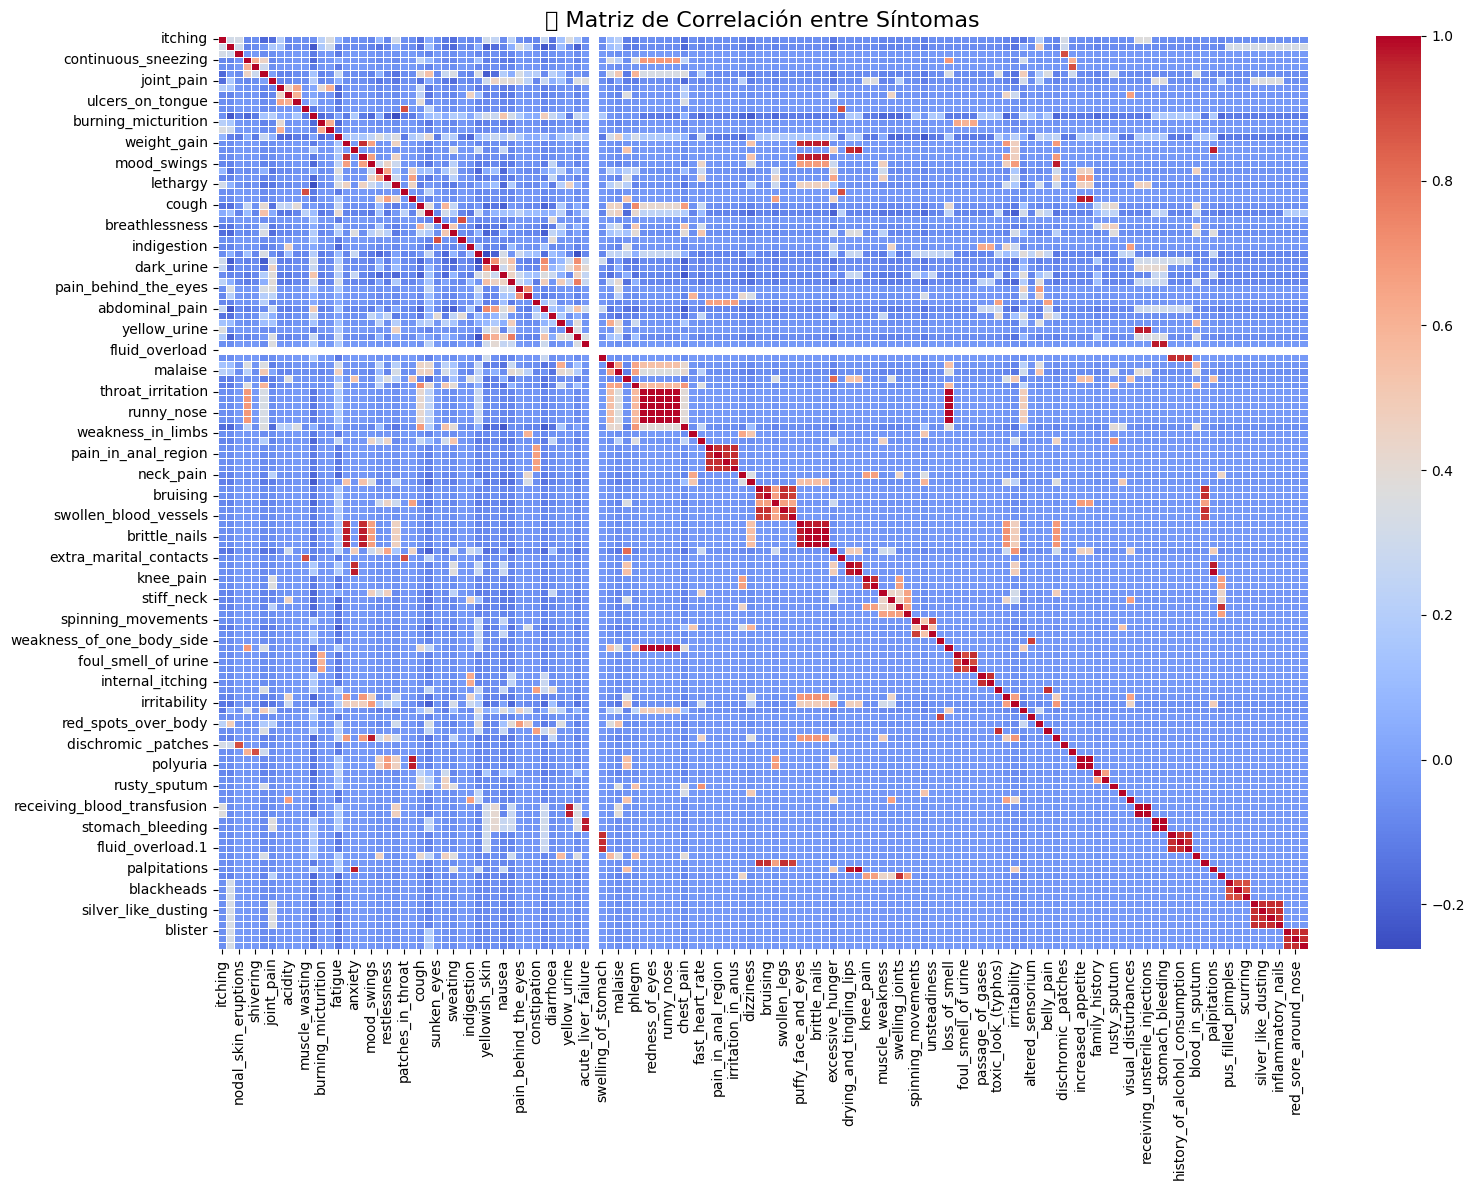

In [39]:
# Separo las caracter√≠sticas (features) de la variable objetivo
X = df.drop('prognosis', axis=1)

# Calculo la matriz de correlaci√≥n entre todas las variables
matriz_correlacion = X.corr()

# Muestro la matriz de correlaci√≥n con un mapa de calor
plt.figure(figsize=(16, 12))  # Tama√±o del gr√°fico
sns.heatmap(matriz_correlacion, cmap='coolwarm', linewidths=0.5)
plt.title("üîç Matriz de Correlaci√≥n entre S√≠ntomas", fontsize=16)
plt.tight_layout()
plt.show()

üóíÔ∏è Dado que desde la gr√°fica se dificulta observar cu√°les son las variables con alto √≠ndice de correlaci√≥n se procede a su listado.

In [40]:
# Busco y almaceno todos los pares con correlaci√≥n > 0.9 (positiva o negativa)
valores_correlacionados_altos = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i + 1, len(matriz_correlacion.columns)):
        valor = matriz_correlacion.iloc[i, j]
        if abs(valor) > 0.9:
            valores_correlacionados_altos.append((matriz_correlacion.index[i], matriz_correlacion.columns[j], valor))

# Ordeno los pares por el valor absoluto de su correlaci√≥n (de mayor a menor)
valores_correlacionados_altos_ordenado = sorted(valores_correlacionados_altos, key=lambda x: abs(x[2]), reverse=True)

# Muestro los pares encontrados
print("üîó Pares de s√≠ntomas con correlaci√≥n > 0.9:\n")
for var1, var2, valor in valores_correlacionados_altos_ordenado:
    print(f"{var1} ‚Üî {var2}: correlaci√≥n = {valor:.2f}")

üîó Pares de s√≠ntomas con correlaci√≥n > 0.9:

throat_irritation ‚Üî redness_of_eyes: correlaci√≥n = 1.00
throat_irritation ‚Üî sinus_pressure: correlaci√≥n = 1.00
throat_irritation ‚Üî runny_nose: correlaci√≥n = 1.00
throat_irritation ‚Üî congestion: correlaci√≥n = 1.00
throat_irritation ‚Üî loss_of_smell: correlaci√≥n = 1.00
redness_of_eyes ‚Üî sinus_pressure: correlaci√≥n = 1.00
redness_of_eyes ‚Üî runny_nose: correlaci√≥n = 1.00
redness_of_eyes ‚Üî congestion: correlaci√≥n = 1.00
redness_of_eyes ‚Üî loss_of_smell: correlaci√≥n = 1.00
sinus_pressure ‚Üî runny_nose: correlaci√≥n = 1.00
sinus_pressure ‚Üî congestion: correlaci√≥n = 1.00
sinus_pressure ‚Üî loss_of_smell: correlaci√≥n = 1.00
runny_nose ‚Üî congestion: correlaci√≥n = 1.00
runny_nose ‚Üî loss_of_smell: correlaci√≥n = 1.00
congestion ‚Üî loss_of_smell: correlaci√≥n = 1.00
enlarged_thyroid ‚Üî brittle_nails: correlaci√≥n = 1.00
enlarged_thyroid ‚Üî swollen_extremeties: correlaci√≥n = 1.00
brittle_nails ‚Üî swollen_extreme

Se observa gran cantidad de variables con alta correlaci√≥n, por el momento, y debido a la cantidad de s√≠ntomas no se toman decisiones para reducir dimensionalidad.

##### ![6) Data Wrangling / Data Munging:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Wrangling%20Munging.jpg?raw=true)

üóíÔ∏è Codificaci√≥n de variables categ√≥ricas.<br>
Se confirma que no hay variables categ√≥ricas, adem√°s de la variable target.

üóíÔ∏è Normalizaci√≥n o escalado.<br>
No es necesario aplicar normalizaci√≥n o escalado. Todas las variables ya est√°n en la misma escala (0 o 1). Todas las variables (s√≠ntomas) son binarias, es decir, solo toman valores 0 o 1.<br>

üóíÔ∏è Codificamos columna objetivo (prognosis) usando LabelEncoder. Esto lo hacemos para que el modelo pueda procesar dicha columna.<br>
Este m√©todo convierte cada clase en un n√∫mero entero √∫nico.<br>
<br>
Se crea una nueva columna prognosis_encoded que contiene valores num√©ricos. Cada n√∫mero representa una enfermedad distinta.<br>

In [41]:
# Creamos una instancia del codificador
label_encoder = LabelEncoder()

# Aplicamos el codificador sobre la columna "prognosis"
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

# Mostramos la codificaci√≥n
print("üîç Mapeo de enfermedades (prognosis):")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i} ‚Üí {class_label}")

üîç Mapeo de enfermedades (prognosis):
0 ‚Üí (vertigo) Paroymsal  Positional Vertigo
1 ‚Üí AIDS
2 ‚Üí Acne
3 ‚Üí Alcoholic hepatitis
4 ‚Üí Allergy
5 ‚Üí Arthritis
6 ‚Üí Bronchial Asthma
7 ‚Üí Cervical spondylosis
8 ‚Üí Chicken pox
9 ‚Üí Chronic cholestasis
10 ‚Üí Common Cold
11 ‚Üí Dengue
12 ‚Üí Diabetes 
13 ‚Üí Dimorphic hemmorhoids(piles)
14 ‚Üí Drug Reaction
15 ‚Üí Fungal infection
16 ‚Üí GERD
17 ‚Üí Gastroenteritis
18 ‚Üí Heart attack
19 ‚Üí Hepatitis B
20 ‚Üí Hepatitis C
21 ‚Üí Hepatitis D
22 ‚Üí Hepatitis E
23 ‚Üí Hypertension 
24 ‚Üí Hyperthyroidism
25 ‚Üí Hypoglycemia
26 ‚Üí Hypothyroidism
27 ‚Üí Impetigo
28 ‚Üí Jaundice
29 ‚Üí Malaria
30 ‚Üí Migraine
31 ‚Üí Osteoarthristis
32 ‚Üí Paralysis (brain hemorrhage)
33 ‚Üí Peptic ulcer diseae
34 ‚Üí Pneumonia
35 ‚Üí Psoriasis
36 ‚Üí Tuberculosis
37 ‚Üí Typhoid
38 ‚Üí Urinary tract infection
39 ‚Üí Varicose veins
40 ‚Üí hepatitis A


In [42]:
df.head(30)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
1         1          1                     1                    0          0   
2         0          1                     1                    0          0   
3         1          0                     1                    0          0   
4         1          1                     0                    0          0   
5         1          1                     1                    0          0   
6         0          1                     1                    0          0   
7         1          0                     1                    0          0   
8         1          1                     0                    0          0   
9         1          1                     1                    0          0   
10        1          1                     1                    0          0   
11        0          0                     0                    1          1   
12        0          0                     0                    0          1   
13        0          0                     0                    1          0   
14        0          0                     0                    1          1   
15        0          0                     0                    1          1   
16        0          0                     0                    0          1   
17        0          0                     0                    1          0   
18        0          0                     0                    1          1   
19        0          0                     0                    1          1   
20        0          0                     0                    1          1   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    0          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1        0           0             0        0                 0   
2        0           0             0        0                 0   
3        0           0             0        0                 0   
4        0           0             0        0                 0   
5        0           0             0        0                 0   
6        0           0             0        0                 0   
7        0           0             0        0                 0   
8        0           0             0        0                 0   
9        0           0             0        0                 0   
10       0           0             0        0                 0   
11       1           0             0        0                 0   
12       1           0             0        0                 0   
13       1           0             0        0                 0   
14       0           0             0        0                 0   
15       1           0             0        0                 0   
16       1           0             0        0                 0   
17       1           0             0        0                 0   
18       0           0             0        0                 0   
19       1           0             0        0                 0   
20       1           0             0        0                 0   
21       0           0             1        1                 1   
22       0           0             1        0    

##### ![Primeras conclusiones:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Primeras%20conclusiones.jpg?raw=true)

- Todo indica que se trata de un problema de clasificaci√≥n multiclase con 41 enfermedades como clases posibles. <br>
- Nuestra variable objetivo ser√° "prognosis". <br>
- Se confirma que no hay columnas categ√≥ricas (adem√°s de la target). <br>

##### ![Selecci√≥n y entrenamiento del modelo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Selecci%C3%B3n%20y%20entrenamiento%20del%20modelo%20fundamentos.jpg?raw=true)

Procedemos a separar en X (features) e Y (target):<br>
- X: todas las columnas de s√≠ntomas (features)<br>
- y: la columna codificada prognosis_encoded (target)<br>

In [43]:
# -----------------------------------------------
# üéØ SEPARACI√ìN DE FEATURES (X) Y TARGET (y)
# -----------------------------------------------

# Paso 1: Definir las variables independientes (X)
# Excluimos la columna objetivo codificada y cualquier otra que no queramos usar como feature
X = df.drop(columns=['prognosis', 'prognosis_encoded'])  # usamos solo los s√≠ntomas

# Paso 2: Definir la variable dependiente (y)
# Usamos la versi√≥n codificada de la columna objetivo
y = df['prognosis_encoded']

# Paso 3: Verificar dimensiones
print(f"üìê Dimensi√≥n de X (features): {X.shape}")
print(f"üéØ Dimensi√≥n de y (target): {y.shape}")

# X: contiene todos los s√≠ntomas (sin la columna de diagn√≥stico).
# y: contiene el diagn√≥stico codificado num√©ricamente (prognosis_encoded).
# Imprime las dimensiones de ambos para confirmar que todo est√° en orden.

üìê Dimensi√≥n de X (features): (4920, 132)
üéØ Dimensi√≥n de y (target): (4920,)


Luego, procedemos a dividir el dataset en #conjunto_de_entrenamiento y #conjunto_de_pruebas.<br>

In [44]:
# Paso 2: Dividir los datos en entrenamiento y prueba
# Usamos 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                  # Features y target
    test_size=0.2,         # 20% para test
    random_state=42,       # Semilla para reproducibilidad
    stratify=y             # Mantiene la proporci√≥n de clases en y
)

# Paso 3: Mostrar el tama√±o de cada subconjunto
print(f"üîß X_train: {X_train.shape}")
print(f"üß™ X_test:  {X_test.shape}")
print(f"üéØ y_train: {y_train.shape}")
print(f"üéØ y_test:  {y_test.shape}")

üîß X_train: (3936, 132)
üß™ X_test:  (984, 132)
üéØ y_train: (3936,)
üéØ y_test:  (984,)


Procedemos a evaluar distintos Modelos de Machine Learning <br>

Comentarios: Tipo de problema de Clasificaci√≥n multiclase (porque queremos predecir una entre varias clases posibles). Esto implica que vamos a construir modelos de clasificaci√≥n que puedan identificar a cu√°l de esas 41 enfermedades pertenece cada muestra, en base a los s√≠ntomas.<br>

ü§ñ 1. Random Forest Classifier<br>

In [45]:
# -----------------------------------------------
# üå≤ RANDOM FOREST CLASSIFIER
# -----------------------------------------------

# Paso 1:Creamos una instancia del modelo
# - n_estimators: n√∫mero de √°rboles en el bosque
# - random_state: semilla para reproducibilidad
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)

# Paso 2: Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Paso 3: Hacemos predicciones sobre el conjunto de prueba
rf_preds = rf_model.predict(X_test)

# Paso 4: Evaluamos el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("üéØ [Random Forest] Accuracy:", accuracy_score(y_test, rf_preds))
print("üìã [Random Forest] Classification Report:")
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))

üéØ [Random Forest] Accuracy: 1.0
üìã [Random Forest] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            C

üóíÔ∏è Conclusi√≥n Random Forest Classifier:
- Habiendo logrado una accuracy de 1.0 (o 100%) esto nos indica que el modelo predijo correctamente TODAS las muestras del conjunto de prueba.
- El modelo clasific√≥ correctamente todas las enfermedades del test.
- No hubo falsos positivos ni falsos negativos.
- Todas las clases tienen el mismo n√∫mero de muestras (24)

ü§ñ 2. K-Nearest Neighbors (KNN)<br>

In [46]:
# -----------------------------------------------
# üë• K-NEAREST NEIGHBORS (KNN)
# -----------------------------------------------

# Paso 1: Importamos el modelo desde sklearn
from sklearn.neighbors import KNeighborsClassifier

# Paso 2: Crear una instancia del modelo
# n_neighbors: n√∫mero de vecinos a considerar
knn_model = KNeighborsClassifier(n_neighbors=5)

# Paso 3: Entrenamos el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Paso 4: Hacemos las predicciones sobre el conjunto de prueba
knn_preds = knn_model.predict(X_test)

# Paso 5: Evaluamos el rendimiento del modelo
print("üéØ [KNN] Accuracy:", accuracy_score(y_test, knn_preds))
print("üìã [KNN] Classification Report:")
print(classification_report(y_test, knn_preds, target_names=label_encoder.classes_))

üéØ [KNN] Accuracy: 1.0
üìã [KNN] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.0

üóíÔ∏è Conclusi√≥n K-Nearest Neighbors (KNN):
- Al igual que con el modelo Random Forest Classifier se alcanza una accuracy de 1.0 (o 100%)

ü§ñ 3. Support Vector Machine (SVM)<br>

In [47]:
# -----------------------------------------------
# üí† SUPPORT VECTOR MACHINE (SVM)
# -----------------------------------------------

# Paso 1: Importamos el modelo desde sklearn
from sklearn.svm import SVC

# Paso 2: Creamos una instancia del modelo
# kernel='linear': usaremos un kernel lineal para clasificaci√≥n
svm_model = SVC(kernel='linear', probability=True)

# Paso 3: Entrenamos el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Paso 4: Hacemos predicciones sobre el conjunto de prueba
svm_preds = svm_model.predict(X_test)

# Paso 5: Evaluamos el rendimiento del modelo
print("üéØ [SVM] Accuracy:", accuracy_score(y_test, svm_preds))
print("üìã [SVM] Classification Report:")
print(classification_report(y_test, svm_preds, target_names=label_encoder.classes_))

üéØ [SVM] Accuracy: 1.0
üìã [SVM] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.0

##### ![Conclusiones finales:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Conclusiones%20finales.jpg?raw=true)

Los 3 modelos mostraron un 100% de precisi√≥n, lo cual indica que el problema est√° muy bien definido y probablemente los s√≠ntomas determinan claramente la enfermedad.<br>
- Cada combinaci√≥n de s√≠ntomas apunta a un diagn√≥stico √∫nico.<br>
- No hay ambig√ºedad o ruido en los datos.<br>


üß† Interpretaci√≥n<br>
Los tres modelos clasificaron correctamente todos los casos del set de prueba.<br>
Esto indica que el problema es altamente separable y que los s√≠ntomas determinan muy bien el diagn√≥stico.<br>
Es posible que el dataset tenga patrones muy claros o incluso s√≠ntomas √∫nicos por enfermedad.<br>

<br>
<br>
<br>
<br>
<br>
<br>